In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving cleaned_datasets.xlsx to cleaned_datasets.xlsx


In [ ]:
import pandas as pd  # IMPORTING PANDAS LIBRARY FOR DATA MANIPULATION

# LOAD THE ENTIRE EXCEL FILE
file_path = "cleaned_datasets.xlsx"  # SPECIFYING THE FILE PATH OF THE EXCEL FILE

# GET SHEET NAMES FROM THE EXCEL FILE
xls = pd.ExcelFile(file_path)  # LOADING THE EXCEL FILE TO ACCESS SHEET NAMES
print(xls.sheet_names)  # DISPLAYS AVAILABLE SHEET NAMES IN THE EXCEL FILE

# READ THE "MACHINE DOWNTIME" SHEET INTO A DATAFRAME
df_downtime = pd.read_excel(file_path, sheet_name="Machine Downtime")  # LOADING DATA FROM THE SPECIFIED SHEET
df_downtime.head()  # DISPLAYING THE FIRST FIVE ROWS OF THE DATAFRAME


['Production Time Data', 'Employee Performance', 'Machine Downtime', 'Supplier & Material', 'Trend analysis', 'Defect Rates', 'Correlation Analysis', 'Graphs']


,Month-Year,Machine_ID,Breakdowns_In_a_Month,Avg_Repair_Time_Hours
0,2025-07-24,201,2,2.5
1,NaT,202,2,2.0
2,NaT,203,1,1.2
3,NaT,204,3,2.8
4,NaT,205,2,1.8


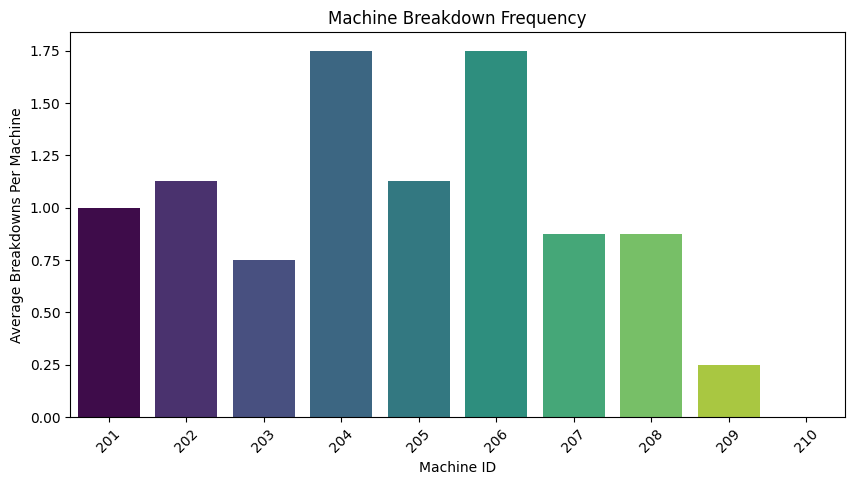

In [ ]:
#BAR CHART FOR VISUALISING MACHINE BREAKDOWN FREQUENCY
import pandas as pd  # IMPORT PANDAS
import matplotlib.pyplot as plt  # IMPORT MATPLOTLIB FOR PLOTTING
import seaborn as sns  # IMPORT SEABORN FOR BETTER VISUALIZATION

plt.figure(figsize=(10, 5))  # SET FIGURE SIZE

sns.barplot(x="Machine_ID", y="Breakdowns_In_a_Month", data=df_downtime,
            palette="viridis", errorbar=None, hue="Machine_ID", legend=False)  # CREATE BAR PLOT

plt.xlabel("Machine ID")  # X-AXIS LABEL
plt.ylabel("Average Breakdowns Per Machine")  # Y-AXIS LABEL
plt.title("Machine Breakdown Frequency")  # SET TITLE
plt.xticks(rotation=45)  # ROTATE X-TICKS

plt.show()  # DISPLAY PLOT


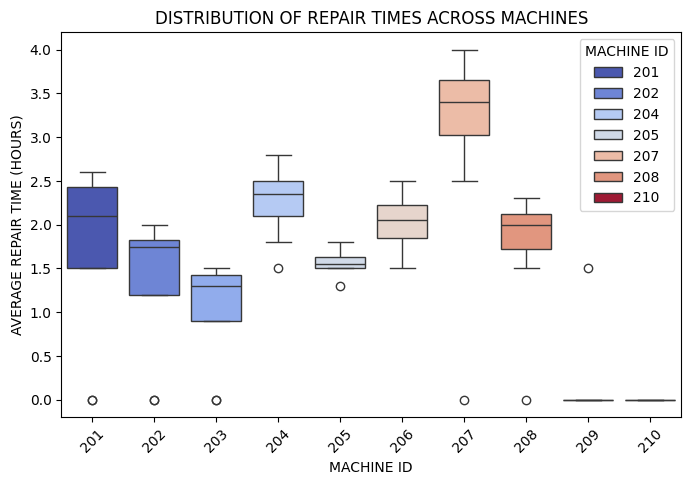

In [ ]:
# BOX PLOT FOR REPAIR TIME DISTRIBUTION
plt.figure(figsize=(8, 5))
sns.boxplot(x="Machine_ID", y="Avg_Repair_Time_Hours", hue="Machine_ID", data=df_downtime, palette="coolwarm")

plt.xlabel("MACHINE ID")
plt.ylabel("AVERAGE REPAIR TIME (HOURS)")
plt.title("DISTRIBUTION OF REPAIR TIMES ACROSS MACHINES")
plt.xticks(rotation=45)  # ROTATE X-AXIS LABELS FOR BETTER READABILITY
plt.legend(title="MACHINE ID")  # ADD LEGEND FOR BETTER UNDERSTANDING
plt.show()


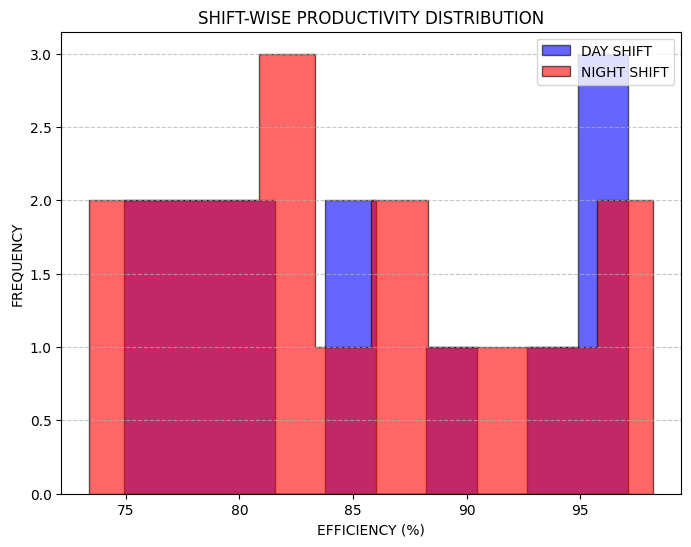

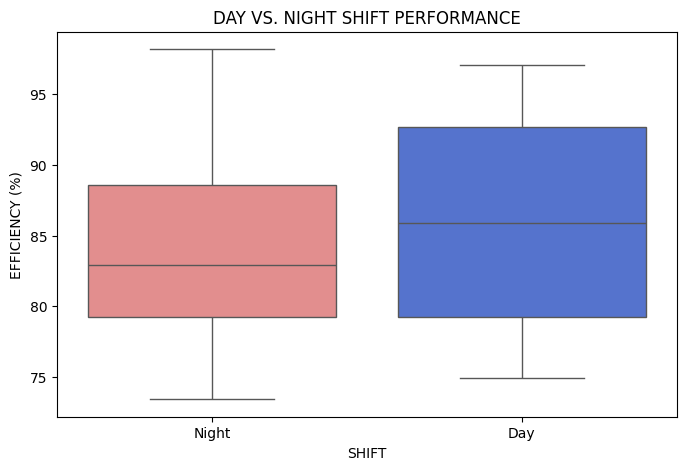

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD THE DATASET
df_employee = pd.read_excel(file_path, sheet_name="Employee Performance")

# PLOT HISTOGRAM: SHIFT-WISE PRODUCTIVITY DISTRIBUTION
day_shift = df_employee[df_employee["Shift"] == "Day"]["Efficiency (%)"]
night_shift = df_employee[df_employee["Shift"] == "Night"]["Efficiency (%)"]

plt.figure(figsize=(8, 6))

# IMPROVED HISTOGRAM VISUALIZATION
plt.hist(day_shift, bins=10, alpha=0.6, color="blue", edgecolor="black", label="DAY SHIFT", histtype='stepfilled')
plt.hist(night_shift, bins=10, alpha=0.6, color="red", edgecolor="black", label="NIGHT SHIFT", histtype='stepfilled')

plt.xlabel("EFFICIENCY (%)")
plt.ylabel("FREQUENCY")
plt.title("SHIFT-WISE PRODUCTIVITY DISTRIBUTION")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="upper right")  # ENSURE THE LEGEND IS PLACED PROPERLY
plt.show()

# PLOT BOX PLOT: DAY VS. NIGHT SHIFT PERFORMANCE
plt.figure(figsize=(8, 5))
sns.boxplot(x="Shift", y="Efficiency (%)", data=df_employee, hue="Shift", dodge=False, palette={"Day": "royalblue", "Night": "lightcoral"})

plt.xlabel("SHIFT")
plt.ylabel("EFFICIENCY (%)")
plt.title("DAY VS. NIGHT SHIFT PERFORMANCE")

plt.show()


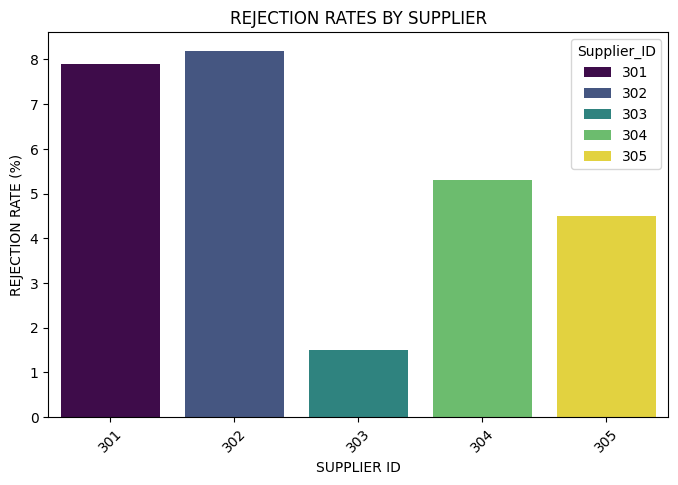

In [ ]:
# LOAD THE DATASET
df_supplier = pd.read_excel(file_path, sheet_name="Supplier & Material")
df_supplier_sorted = df_supplier.sort_values(by="Rejection_Rate (%)", ascending=False)

# PLOT BAR CHART: REJECTION RATES BY SUPPLIER
plt.figure(figsize=(8, 5))
sns.barplot(x="Supplier_ID", y="Rejection_Rate (%)", data=df_supplier_sorted, hue="Supplier_ID", palette="viridis")
plt.xlabel("SUPPLIER ID")
plt.ylabel("REJECTION RATE (%)")
plt.title("REJECTION RATES BY SUPPLIER")
plt.xticks(rotation=45)  # ROTATE LABELS IF NEEDED
plt.show()


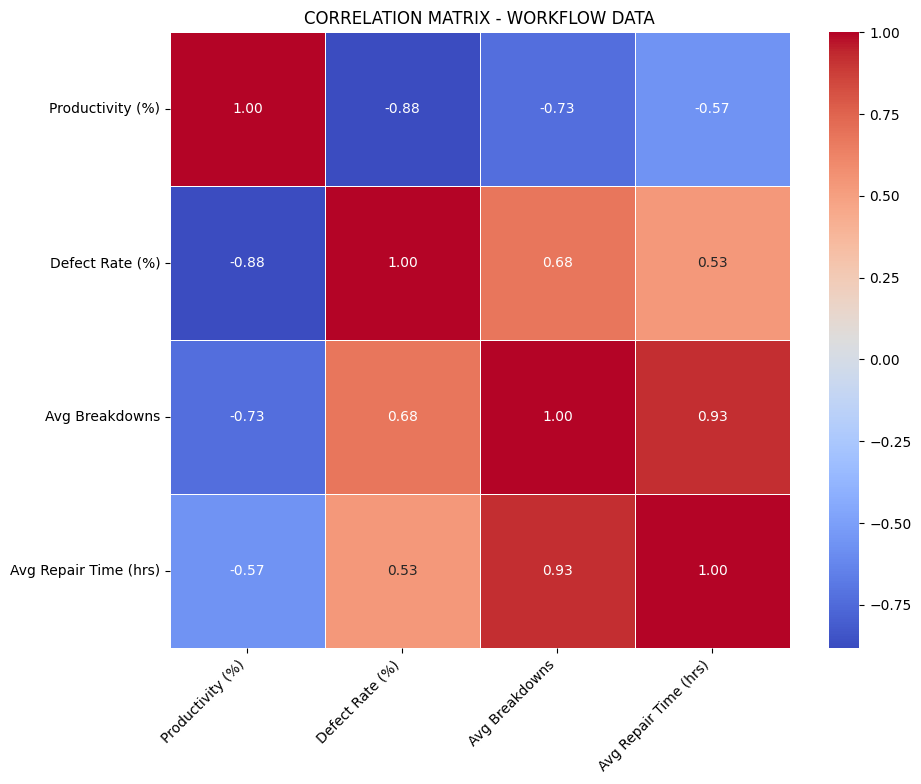

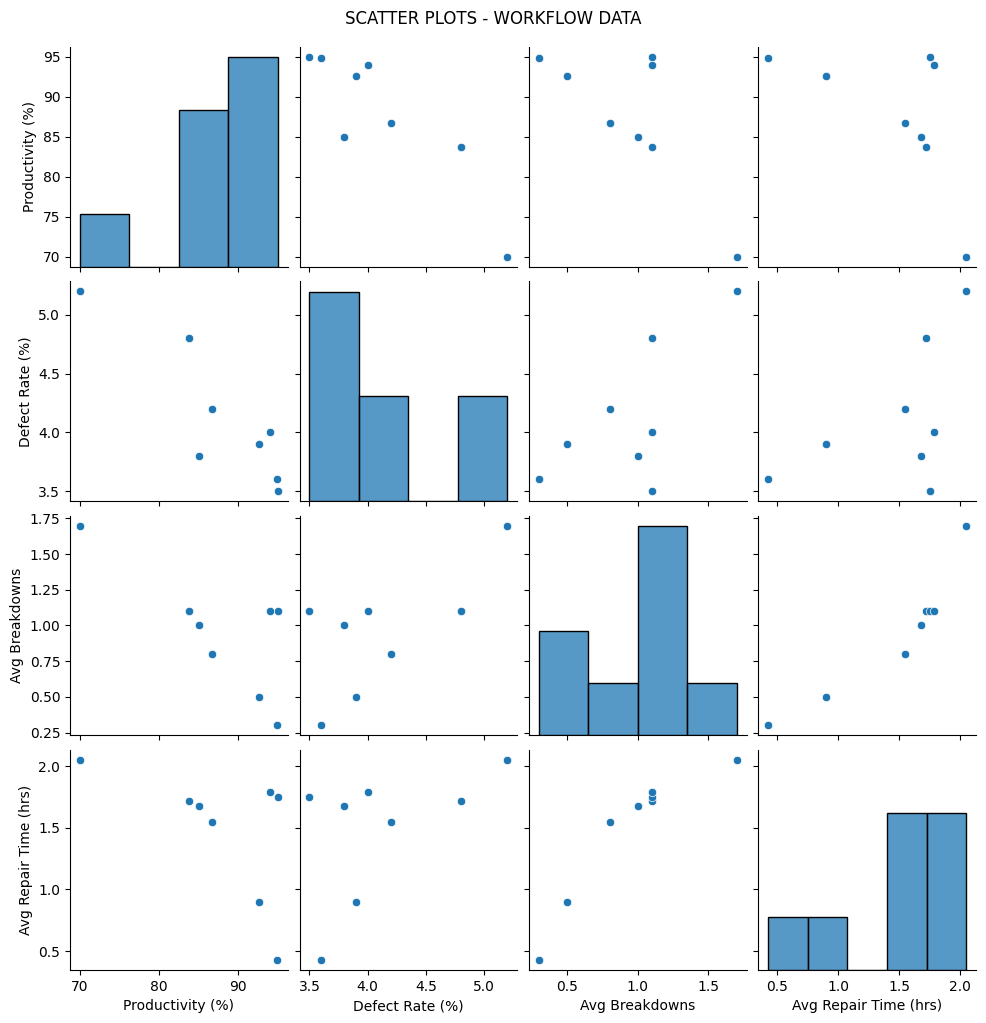

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READ THE CORRECT CORRELATION ANALYSIS SHEET
df = pd.read_excel(file_path, sheet_name="Correlation Analysis")

# DROP NON-NUMERIC COLUMNS AND ENSURE ALL RELEVANT COLUMNS ARE INCLUDED
df_numeric = df.select_dtypes(include=['number'])

# IDENTIFY AND REMOVE CONSTANT COLUMNS (SINGLE UNIQUE VALUE)
constant_columns = [col for col in df_numeric.columns if df_numeric[col].nunique() == 1]
df_numeric = df_numeric.drop(columns=constant_columns)

# COMPUTE THE CORRELATION MATRIX
correlation_matrix = df_numeric.corr()

# PLOT THE HEATMAP WITH BETTER FORMATTING
plt.figure(figsize=(10, 8))  # INCREASE FIGURE SIZE
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha='right')  # ROTATE X-AXIS LABELS FOR READABILITY
plt.yticks(rotation=0)  # KEEP Y-AXIS LABELS HORIZONTAL
plt.title("CORRELATION MATRIX - WORKFLOW DATA")

plt.show()

# PAIRPLOT FOR SCATTER PLOTS
sns.pairplot(df_numeric)
plt.suptitle("SCATTER PLOTS - WORKFLOW DATA", y=1.02)  # ADJUST TITLE POSITION
plt.show()
